In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

---

# Data Preparation using pandas

An initial step in statistical data analysis is the preparation of the data to be used in the analysis. In practice, ~~a little~~ ~~some~~ ~~much~~ the majority of the actual time spent on a statistical modeling project is typically devoted to importing, cleaning, validating and transforming the dataset.

This section will introduce [pandas](http://pandas.pydata.org/), an important third-party Python package for data analysis, as a tool for data preparation, and provide some general advice for what should or should not be done to data before it is analyzed.

## Introduction to pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- **Tabular** data with heterogeneously-typed columns, as you might find in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) **time series** data.
- Arbitrary **matrix** data with row and column labels

Virtually any statistical dataset, labeled or unlabeled, can be converted to a pandas data structure for cleaning, transformation, and analysis.


### Key features
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [2]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [3]:
counts.values

array([ 632, 1638,  569,  115])

In [4]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available. These counts are of bacteria taxa constituting the microbiome of hospital patients, so using the taxon of each bacterium is a useful index.

In [5]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [6]:
bacteria['Actinobacteria']

569

In [7]:
bacteria[bacteria.index.str.endswith('bacteria')]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [8]:
'Bacteroidetes' in bacteria

True

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [9]:
bacteria[0]

632

We can give both the array of values and the index meaningful labels themselves:

In [10]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [11]:
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

We can also filter according to the values in the `Series`:

In [12]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [13]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
bact = pd.Series(bacteria_dict)

In [14]:
bact

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. pandas uses the `NaN` (not a number) type for missing values.

In [15]:
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [16]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [17]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [18]:
bacteria_data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
bacteria_data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [19]:
bacteria_data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [20]:
bacteria_data.columns

Index(['patient', 'phylum', 'value'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [21]:
bacteria_data['value']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [22]:
bacteria_data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

Using the standard indexing syntax for a single column of data from a `DataFrame` returns the column as a `Series`.

In [23]:
type(bacteria_data['value'])

pandas.core.series.Series

Passing the column name as a list returns the column as a `DataFrame` instead.

In [24]:
bacteria_data[['value']]

,value
0,632
1,1638
2,569
3,115
4,433
5,1130
6,754
7,555


Notice that indexing works differently with a `DataFrame` than with a `Series`, where in the latter, dict-like indexing retrieved a particular element (row). If we want access to a row in a `DataFrame`, we index its `loc` attribute.

In [25]:
bacteria_data.loc[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

Since a row potentially contains different data types, the returned `Series` of values is of the generic `object` type.

### Exercise

Try out these commands to see what they return:

- data.head()
- data.tail(3)
- data.shape

If we want to create a `DataFrame` row-wise rather than column-wise, we can do so with a dict of dicts:

In [26]:
bacteria_data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}])

In [27]:
bacteria_data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


### Views

Its important to note that the `Series` returned when a `DataFrame` is indexed is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be *cautious* when manipulating this data.

For example, let's isolate a column of our dataset by assigning it as a `Series` to a variable.

In [28]:
vals = bacteria_data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

Now, let's assign a new value to one of the elements of the `Series`.

In [29]:
vals[5] = 0
vals

/Users/fonnescj/anaconda3/envs/stat_pycon/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

However, we may not anticipate that the value in the original `DataFrame` has also been changed!

In [30]:
bacteria_data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


We can avoid this by working with a copy when modifying subsets of the original data.

In [31]:
vals = bacteria_data.value.copy()
vals[5] = 1000

bacteria_data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


So, as we have seen, we can create or modify columns by assignment; let's put back the value we accidentally changed.

In [32]:
bacteria_data.value[5] = 1130

/Users/fonnescj/anaconda3/envs/stat_pycon/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Or, we may wish to add a column representing the year the data were collected.

In [33]:
bacteria_data['year'] = 2013
bacteria_data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,115,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,1130,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


But note, we cannot use the attribute indexing method to add a new column:

In [34]:
bacteria_data.treatment = 1
bacteria_data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,115,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,1130,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


In [35]:
bacteria_data.treatment

1

### Auto-alignment

When adding a column that is not a simple constant, we need to be a bit more careful. Due to pandas' auto-alignment behavior, specifying a `Series` as a new column causes its values to be added according to the `DataFrame`'s index:

In [36]:
treatment = pd.Series([0]*4 + [1]*2)

treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [37]:
bacteria_data['treatment'] = treatment

bacteria_data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,115,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,1130,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [38]:
month = ['Jan', 'Feb', 'Mar', 'Apr']
bacteria_data['month'] = month

ValueError: Length of values does not match length of index

In [39]:
bacteria_data['month'] = ['Jan']*len(bacteria_data)

bacteria_data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,115,2013,0.0,Jan
4,2,Firmicutes,433,2013,1.0,Jan
5,2,Proteobacteria,1130,2013,1.0,Jan
6,2,Actinobacteria,754,2013,NaN,Jan
7,2,Bacteroidetes,555,2013,NaN,Jan


We can use `del` to remove columns, in the same way `dict` entries can be removed:

In [40]:
del bacteria_data['month']

bacteria_data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,115,2013,0.0
4,2,Firmicutes,433,2013,1.0
5,2,Proteobacteria,1130,2013,1.0
6,2,Actinobacteria,754,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


Or employ the `drop` method.

In [41]:
bacteria_data.drop('treatment', axis=1)

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,115,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,1130,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [42]:
bacteria_data.values

array([[1, 'Firmicutes', 632, 2013, 0.0],
       [1, 'Proteobacteria', 1638, 2013, 0.0],
       [1, 'Actinobacteria', 569, 2013, 0.0],
       [1, 'Bacteroidetes', 115, 2013, 0.0],
       [2, 'Firmicutes', 433, 2013, 1.0],
       [2, 'Proteobacteria', 1130, 2013, 1.0],
       [2, 'Actinobacteria', 754, 2013, nan],
       [2, 'Bacteroidetes', 555, 2013, nan]], dtype=object)

Notice that because of the mix of string, integer and float (and `NaN`) values, the dtype of the array is `object`. The dtype will automatically be chosen to be as general as needed to accomodate all the columns.

In [43]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})

df.values, df.values.dtype

(array([[ 0.4,  1. ],
        [-1. ,  2. ],
        [ 4.5,  3. ]]), dtype('float64'))

pandas uses a custom data structure to represent the **indices** of Series and DataFrames.

In [44]:
bacteria_data.index

RangeIndex(start=0, stop=8, step=1)

Index objects are immutable:

In [45]:
bacteria_data.index[0] = 15

TypeError: Index does not support mutable operations

This is so that Index objects can be shared between data structures without fear that they will be changed.

In [46]:
bacteria2.index = bacteria.index

bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

### Excercise: Indexing

From the `bacteria_data` table above, create an index to return all rows for which the phylum name ends in "bacteria" and the value is greater than 1000.

In [47]:
# Write your answer here

# Using pandas

This section, we will import and clean up some of the datasets that we will be using later on in the tutorial. And in doing so, we will introduce the key functionality of pandas that is required to use the software effectively.

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

### Delimited data

The file `olympics.1996.txt` in the `data` directory contains counts of medals awarded at the 1996 Summer Olympic Games by country, along with the countries' respective population sizes. This data is stored in a tab-separated format.

![olympics](images/_olympics.png)

In [48]:
!head ../data/olympics.1996.txt

Tonga	1	96165
Bahamas	1	281584
Jamaica	6	2589043
Cuba	25	10952046
Australia	41	18348078
Hungary	21	10273590
Bulgaria	15	8181047
Trinidad & Tobago	2	1196910
New Zealand	6	3621200
Norway	7	4381275


This table can be read into a DataFrame using `read_table`. 

In [49]:
medals = pd.read_table('../data/olympics.1996.txt', sep='\t',
                       index_col=0,
                       header=None, names=['country', 'medals', 'population'])
medals.head()

,medals,population
country,,
Tonga,1,96165
Bahamas,1,281584
Jamaica,6,2589043
Cuba,25,10952046
Australia,41,18348078


There is no header row in this dataset, so we specified this, and provided our own **header names**. If we did not specify `header=None` the function would have assumed the first row contained column names.

The tab **separator** was passed to the `sep` argument as `\t`.

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately common in some datasets: 
    
    sep='\s+'

### Scraping Data from the Web

We would like to add another variable to this dataset. Along with population, a country's economic development may be a useful predictor of Olympic success. A very simple indicator of this might be OECD membership status. 

The [OECD website](http://www.oecd.org/about/membersandpartners/list-oecd-member-countries.htm) contains a table listing OECD member nations, along with its year of membership. We would like to import this table and extract the contries that were members as of the 1996 games.

The `read_html` function accepts a URL argument, and will attempt to extract all the tables from that address, returning whatever it finds in a **list of `DataFrame`s**.

In [50]:
oecd_site = 'http://www.oecd.org/about/membersandpartners/list-oecd-member-countries.htm'
pd.read_html(oecd_site)

[                                                   0
 0  On 14 December 1960, 20 countries originally s...
 1  Here is a list of the current Member countries...,
                                      0                1                  2   3
 0                                  NaN          Country               Date NaN
 1                                  NaN        AUSTRALIA        7 June 1971 NaN
 2                                  NaN          AUSTRIA  29 September 1961 NaN
 3                                  NaN          BELGIUM  13 September 1961 NaN
 4                                  NaN           CANADA      10 April 1961 NaN
 5                                  NaN            CHILE         7 May 2010 NaN
 6                                  NaN   CZECH REPUBLIC   21 December 1995 NaN
 7                                  NaN          DENMARK        30 May 1961 NaN
 8                                  NaN          ESTONIA    9 December 2010 NaN
 9                                  N

There is typically some cleanup that is required of the returned data, such as the assignment of column names or conversion of types. 

The table of interest is at index 1, and we will extract two columns from the table. Otherwise, this table is pretty clean.

In [55]:
oecd = pd.read_html(oecd_site, header=0)[1][['Country', 'Date']]
oecd.head()

,Country,Date
0,AUSTRALIA,7 June 1971
1,AUSTRIA,29 September 1961
2,BELGIUM,13 September 1961
3,CANADA,10 April 1961
4,CHILE,7 May 2010


In [56]:
oecd['year'] = pd.to_datetime(oecd.Date).apply(lambda x: x.year)
oecd_year = oecd.set_index(oecd.Country.str.title())['year'].dropna()
oecd_year

Country
Australia          1971.0
Austria            1961.0
Belgium            1961.0
Canada             1961.0
Chile              2010.0
Czech Republic     1995.0
Denmark            1961.0
Estonia            2010.0
Finland            1969.0
France             1961.0
Germany            1961.0
Greece             1961.0
Hungary            1996.0
Iceland            1961.0
Ireland            1961.0
Israel             2010.0
Italy              1962.0
Japan              1964.0
Korea              1996.0
Latvia             2016.0
Luxembourg         1961.0
Mexico             1994.0
Netherlands        1961.0
New Zealand        1973.0
Norway             1961.0
Poland             1996.0
Portugal           1961.0
Slovak Republic    2000.0
Slovenia           2010.0
Spain              1961.0
Sweden             1961.0
Switzerland        1961.0
Turkey             1961.0
United Kingdom     1961.0
United States      1961.0
Name: year, dtype: float64

We can create an indicator (binary) variable for OECD status by checking if each country is in the index of countries with membership year less than 1997. 

The new `DataFrame` method `assign` is a convenient means for creating the new column from this operation.

In [57]:
medals_data = medals.assign(oecd=medals.index.isin((oecd_year[oecd_year<1997]).index).astype(int))

Since the distribution of populations spans several orders of magnitude, we may wish to use the logarithm of the population size, which may be created similarly.

In [58]:
medals_data = medals_data.assign(log_population=np.log(medals.population))

The NumPy `log` function will return a pandas `Series` (or `DataFrame` when applied to one) instead of a `ndarray`; all of NumPy's functions are compatible with pandas in this way.

In [59]:
medals_data.head()

,medals,population,oecd,log_population
country,,,,
Tonga,1,96165,0,11.473821
Bahamas,1,281584,0,12.548186
Jamaica,6,2589043,0,14.766799
Cuba,25,10952046,0,16.209037
Australia,41,18348078,1,16.725035


### Comma-separated Values (CSV)

The most common form of delimited data is comma-separated values (CSV). Since CSV is so ubiquitous, the `read_csv` is available as a convenience function for `read_table`.

Consider some more microbiome data.

In [60]:
!cat ../data/microbiome/microbiome.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,1174,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,80
Firmicutes,10,162,3196
Firmicutes,11,372,32
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,96,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteri

This table can be read into a DataFrame using `read_csv`:

In [61]:
mb = pd.read_csv("../data/microbiome/microbiome.csv")
mb.head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605


If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [62]:
pd.read_csv("../data/microbiome/microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,5,831,8605
3,Firmicutes,7,718,717
4,Firmicutes,8,173,33


Conversely, if we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [63]:
few_recs = pd.read_csv("../data/microbiome/microbiome.csv", nrows=4)

few_recs

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial phylum, with 15 patients represented in each:

In [64]:
data_chunks = pd.read_csv("../data/microbiome/microbiome.csv", chunksize=15)
data_chunks

### Exercise: Calculating summary statistics

Import the microbiome data, calculating the mean counts across all patients for each taxon, returning these values in a dictionary.

*Hint: using `chunksize` makes this more efficent!*

In [65]:
# Write your answer here

### Hierarchical Indices

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [66]:
mb = pd.read_csv("../data/microbiome/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

This is called a **hierarchical index**, which allows multiple dimensions of data to be represented in tabular form.

In [67]:
mb.index

MultiIndex(levels=[['Actinobacteria', 'Bacteroidetes', 'Firmicutes', 'Other', 'Proteobacteria'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
           labels=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
           names=['Taxon', 'Patient'])

The corresponding index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, pandas does not print the repeats, making it easy to identify groups of values.

Rows can be indexed by passing the appropriate tuple.

In [68]:
mb.ix[('Firmicutes', 2)]

/Users/fonnescj/anaconda3/envs/stat_pycon/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Tissue     136
Stool     4182
Name: (Firmicutes, 2), dtype: int64

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [69]:
mb.ix['Proteobacteria']

,Tissue,Stool
Patient,,
1,1638,3886
2,2469,1821
3,839,661
4,4414,18
5,12044,83
6,2310,12
7,3053,547
8,395,2174
9,2651,767


To extract arbitrary levels from a hierarchical row index, the **cross-section** method `xs` can be used.

In [70]:
mb.xs(1, level='Patient')

,Tissue,Stool
Taxon,,
Firmicutes,632,305
Proteobacteria,1638,3886
Actinobacteria,569,648
Bacteroidetes,115,380
Other,114,277


We may also reorder levels as we like.

In [71]:
mb.swaplevel('Patient', 'Taxon').head()

,,Tissue,Stool
Patient,Taxon,,
1,Firmicutes,632,305
2,Firmicutes,136,4182
3,Firmicutes,1174,703
4,Firmicutes,408,3946
5,Firmicutes,831,8605


### Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as calculating the ratio of bacteria counts between locations:

In [72]:
mb.Stool / mb.Tissue

Taxon           Patient
Firmicutes      1           0.482595
                2          30.750000
                3           0.598807
                4           9.671569
                5          10.354994
                6           0.072150
                7           0.998607
                8           0.190751
                9           0.350877
                10         19.728395
                11          0.086022
                12          1.024912
                13         15.579439
                14          2.322917
                15          8.459075
Proteobacteria  1           2.372405
                2           0.737546
                3           0.787843
                4           0.004078
                5           0.006891
                6           0.005195
                7           0.179168
                8           5.503797
                9           0.289325
                10          0.063598
                11          0.115940
              

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

The `read_excel` convenience function in pandas imports a specific sheet from an Excel file.

In [73]:
mb = pd.read_excel('../data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb.head()

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


### Relational Databases

If you are fortunate, your data will be stored in a database (relational or non-relational) rather than in arbitrary text files or spreadsheet. Relational databases are particularly useful for storing large quantities of *structured* data, where fields are grouped together in tables according to their relationships with one another.

pandas' `DataFrame` interacts with relational (*i.e.* SQL) databases, and even provides facilties for using SQL syntax on the `DataFrame` itself, which we will get to later. For now, let's work with a ubiquitous embedded database called **SQLite**, which comes bundled with Python. A SQLite database can be queried with the standard library's `sqlite3` module.

In [74]:
import sqlite3

query = '''
CREATE TABLE samples
(taxon VARCHAR(15), patient INTEGER, tissue INTEGER, stool INTEGER);
'''

This query string will create a table to hold some of our microbiome data, which we can execute after connecting to a database (which will be created, if it does not exist).

In [75]:
con = sqlite3.connect('microbiome.sqlite3')
con.execute(query)
con.commit()

In [76]:
few_recs.ix[0]

/Users/fonnescj/anaconda3/envs/stat_pycon/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Taxon      Firmicutes
Patient             1
Tissue            632
Stool             305
Name: 0, dtype: object

In [77]:
con.execute('INSERT INTO samples VALUES(\'{}\',{},{},{})'.format(*few_recs.ix[0]))

In [78]:
query = 'INSERT INTO samples VALUES(?, ?, ?, ?)'
con.executemany(query, few_recs.values[1:])

In [79]:
con.commit()

Using `SELECT` queries, we can read from the database.

In [80]:
cursor = con.execute('SELECT * FROM samples')
rows = cursor.fetchall()

rows

[('Firmicutes', 1, 632, 305),
 ('Firmicutes', 2, 136, 4182),
 ('Firmicutes', 3, 1174, 703),
 ('Firmicutes', 4, 408, 3946)]

These results can be passed directly to a `DataFrame`

In [81]:
pd.DataFrame(rows)

,0,1,2,3
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


To obtain the column names, we can obtain the table information from the database, via the special `PRAGMA` statement.

In [82]:
table_info = con.execute('PRAGMA table_info(samples);').fetchall()

table_info

[(0, 'taxon', 'VARCHAR(15)', 0, None, 0),
 (1, 'patient', 'INTEGER', 0, None, 0),
 (2, 'tissue', 'INTEGER', 0, None, 0),
 (3, 'stool', 'INTEGER', 0, None, 0)]

In [83]:
pd.DataFrame(rows, columns=np.transpose(table_info)[1])

,taxon,patient,tissue,stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


A more direct approach is to pass the query to the `read_sql_query` functon, which returns a populated `DataFrame.

In [84]:
pd.read_sql_query('SELECT * FROM samples', con)

,taxon,patient,tissue,stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


Correspondingly, we can append records into the database with `to_sql`.

In [85]:
more_recs = pd.read_csv("../data/microbiome/microbiome_missing.csv").head(20)

In [86]:
more_recs.to_sql('samples', con, if_exists='append', index=False)

In [87]:
cursor = con.execute('SELECT * FROM samples')
cursor.fetchall()

[('Firmicutes', 1, 632, 305),
 ('Firmicutes', 2, 136, 4182),
 ('Firmicutes', 3, 1174, 703),
 ('Firmicutes', 4, 408, 3946),
 ('Firmicutes', 1, 632, 305),
 ('Firmicutes', 2, 136, 4182),
 ('Firmicutes', 3, None, 703),
 ('Firmicutes', 4, 408, 3946),
 ('Firmicutes', 5, 831, 8605),
 ('Firmicutes', 6, 693, 50),
 ('Firmicutes', 7, 718, 717),
 ('Firmicutes', 8, 173, 33),
 ('Firmicutes', 9, 228, None),
 ('Firmicutes', 10, 162, 3196),
 ('Firmicutes', 11, 372, -99999),
 ('Firmicutes', 12, 4255, 4361),
 ('Firmicutes', 13, 107, 1667),
 ('Firmicutes', 14, '?', 223),
 ('Firmicutes', 15, 281, 2377),
 ('Proteobacteria', 1, 1638, 3886),
 ('Proteobacteria', 2, 2469, 1821),
 ('Proteobacteria', 3, 839, 661),
 ('Proteobacteria', 4, 4414, 18),
 ('Proteobacteria', 5, 12044, 83)]

There are several other data formats that can be imported into Python and converted into DataFrames, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, non-relational databases, and various web APIs.

In [88]:
# Get rid of the database we created
!rm microbiome.sqlite3

## 2014 Ebola Outbreak Data

The `../data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

![ebola](images/ebola.jpg)

From these data files, use pandas to import them and create a single data frame that includes the **daily totals of new cases** for each country. 

We may use this compiled data for more advaned applications later in the course.

The data are taken from [Caitlin Rivers' `ebola` GitHub repository](https://github.com/cmrivers/ebola), and are licenced for both commercial and non-commercial use. The tutorial repository contains a subset of this data from three countries (Sierra Leone, Liberia and Guinea) that we will use as an example. They reside in a nested subdirectory in the `data` directory.

In [89]:
ebola_dirs = !ls ../data/ebola/
ebola_dirs

['LICENSE', 'guinea_data', 'liberia_data', 'sl_data']

Within each country directory, there are CSV files containing daily information regarding the state of the outbreak for that country. The first step is to efficiently import all the relevant files. 

Our approach will be to construct a dictionary containing a list of filenames to import. We can use the `glob` package to identify all the CSV files in each directory. This can all be placed within a **dictionary comprehension**.

In [90]:
import glob

filenames = {data_dir[:data_dir.find('_')]: glob.glob('../data/ebola/{0}/*.csv'.format(data_dir)) for data_dir in ebola_dirs[1:]}

We are now in a position to iterate over the dictionary and import the corresponding files. However, the data layout of the files across the dataset is partially inconsistent.

In [91]:
pd.read_csv('../data/ebola/sl_data/2014-08-12-v77.csv').head()

,date,variable,Kailahun,Kenema,Kono,Kambia,Koinadugu,Bombali,Tonkolili,Port Loko,Pujehun,Bo,Moyamba,Bonthe,Western area urban,Western area rural,National
0,2014-08-12,population,465048,653013,325003.0,341690.0,335471.0,494139,434937,557978,335574,654142,278119,168729.0,1040888,263619,6348350
1,2014-08-12,new_noncase,0,3,0.0,0.0,0.0,0,0,1,0,0,0,0.0,0,0,4
2,2014-08-12,new_suspected,0,9,0.0,0.0,0.0,0,0,0,0,1,0,0.0,0,0,10
3,2014-08-12,new_probable,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0.0,0,0,1
4,2014-08-12,new_confirmed,0,9,0.0,0.0,0.0,0,0,2,0,0,0,0.0,0,0,11


In [92]:
pd.read_csv('../data/ebola/guinea_data/2014-09-02.csv').head()

,Date,Description,Totals,Conakry,Gueckedou,Macenta,Dabola,Kissidougou,Dinguiraye,Telimele,...,Mzerekore,Yomou,Dubreka,Forecariah,Kerouane,Coyah,Dalaba,Beyla,Kindia,Lola
0,2014-09-02,New cases of suspects,11,NaN,5,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-02,New cases of probables,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-02,New cases of confirmed,14,NaN,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-02,Total new cases registered so far,25,0,9,12,0,0,0,0,...,0,0,1,0,0,3,NaN,NaN,NaN,NaN
4,2014-09-02,Total cases of suspects,49,15,5,17,0,0,0,0,...,0,1,1,2,5,0,NaN,NaN,NaN,NaN


Clearly, we will need to develop row **masks** to extract the data we need across all files, without having to manually extract data from each file.

Let's hack at one file to develop the mask.

In [93]:
sample = pd.read_csv('../data/ebola/sl_data/2014-08-12-v77.csv')

To prevent issues with capitalization, we will simply revert all labels to lower case.

In [94]:
lower_vars = sample.variable.str.lower()

Since we are interested in extracting new cases only, we can use the **string accessor** attribute to look for key words that we would like to include or exclude.

In [95]:
case_mask = (lower_vars.str.contains('new') 
             & (lower_vars.str.contains('case') | lower_vars.str.contains('suspect')) 
             & ~lower_vars.str.contains('non')
             & ~lower_vars.str.contains('total'))

We could have instead used regular expressions to do the same thing.

Finally, we are only interested in three columns.

In [96]:
sample.loc[case_mask, ['date', 'variable', 'National']]

,date,variable,National
2,2014-08-12,new_suspected,10


We can now embed this operation in a loop over all the filenames in the database.

In [97]:
datasets = []
for country in filenames:
    
    country_files = filenames[country]
    for f in country_files:
        
        data = pd.read_csv(f)
        
        
        # Convert to lower case to avoid capitalization issues
        data.columns = data.columns.str.lower()
        # Column naming is inconsistent. These procedures deal with that.
        keep_columns = ['date']
        if 'description' in data.columns:
            keep_columns.append('description')
        else:
            keep_columns.append('variable')
            
        if 'totals' in data.columns:
            keep_columns.append('totals')
        else:
            keep_columns.append('national')
            
        # Index out the columns we need, and rename them
        keep_data = data[keep_columns]
        keep_data.columns = 'date', 'variable', 'totals'
        
        # Extract the rows we might want
        lower_vars = keep_data.variable.str.lower()
        # Of course we can also use regex to do this
        case_mask = (lower_vars.str.contains('new') 
                     & (lower_vars.str.contains('case') | lower_vars.str.contains('suspect') 
                                                        | lower_vars.str.contains('confirm')) 
                     & ~lower_vars.str.contains('non')
                     & ~lower_vars.str.contains('total'))
        
        keep_data = keep_data[case_mask].dropna()
        
        # Convert data types
        keep_data['date'] = pd.to_datetime(keep_data.date)
        keep_data['totals'] = keep_data.totals.astype(int)
        
        # Assign country label and append to datasets list
        datasets.append(keep_data.assign(country=country))
        

Now that we have a list populated with `DataFrame` objects for each day and country, we can call `concat` to concatenate them into a single `DataFrame`.

In [98]:
all_data = pd.concat(datasets)
all_data.head()

,date,variable,totals,country
0,2014-08-04,New cases of suspects,5,guinea
1,2014-08-04,New cases of probables,0,guinea
2,2014-08-04,New cases of confirmed,4,guinea
9,2014-08-04,New deaths registered today (confirmed),2,guinea
11,2014-08-04,New deaths registered today (suspects),0,guinea


This works because the structure of each table was identical

### Manipulating indices

Notice from above, however, that the index contains redundant integer index values. We can confirm this:

In [99]:
all_data.index.is_unique

False

We can create a new unique index by calling the `reset_index` method on the new data frame after we import it, which will generate a new ordered, unique index.

In [100]:
all_data = pd.concat(datasets).reset_index(drop=True)
all_data.head()

,date,variable,totals,country
0,2014-08-04,New cases of suspects,5,guinea
1,2014-08-04,New cases of probables,0,guinea
2,2014-08-04,New cases of confirmed,4,guinea
3,2014-08-04,New deaths registered today (confirmed),2,guinea
4,2014-08-04,New deaths registered today (suspects),0,guinea


**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows. For example, records are currently ordered first by country then by day, since this is the order in which they were iterated over and imported. We might arbitrarily want to reverse the order, which is performed by passing the appropriate index values to `reindex`.

In [101]:
all_data.reindex(all_data.index[::-1])

,date,variable,totals,country
636,2014-12-05,new_confirmed,54,sl
635,2014-12-05,new_suspected,24,sl
634,2014-12-04,new_confirmed,37,sl
633,2014-12-04,new_suspected,4,sl
632,2014-12-01,new_confirmed,72,sl
631,2014-12-01,new_suspected,14,sl
630,2014-11-29,new_confirmed,64,sl
629,2014-11-29,new_suspected,24,sl
628,2014-11-28,new_confirmed,84,sl
627,2014-11-28,new_suspected,26,sl


Notice that the reindexing operation is not performed "in-place"; the original `DataFrame` remains as it was, and the method returns a copy of the `DataFrame` with the new index. This is a common trait for pandas, and is a Good Thing.

We may also wish to reorder the columns this way.

In [102]:
all_data.reindex(columns=['date', 'country', 'variable', 'totals']).head()

,date,country,variable,totals
0,2014-08-04,guinea,New cases of suspects,5
1,2014-08-04,guinea,New cases of probables,0
2,2014-08-04,guinea,New cases of confirmed,4
3,2014-08-04,guinea,New deaths registered today (confirmed),2
4,2014-08-04,guinea,New deaths registered today (suspects),0


## Group by operations

One of pandas' most powerful features is the ability to perform operations on subgroups of a `DataFrame`. These so-called **group by** operations defines subunits of the dataset according to the values of one or more variabes in the `DataFrame`.

For this data, we want to sum the new case counts by day and country; so we pass these two column names to the `groupby` method, then sum the `totals` column accross them.

In [103]:
all_data_grouped = all_data.groupby(['country', 'date'])
daily_cases = all_data_grouped['totals'].sum()
daily_cases.head(10)

country  date      
guinea   2014-08-04    11
         2014-08-26    28
         2014-08-27    22
         2014-08-30    24
         2014-08-31    46
         2014-09-02    25
         2014-09-04    30
         2014-09-07    18
         2014-09-08    18
         2014-09-09    16
Name: totals, dtype: int64

The resulting series retains a hierarchical index from the group by operation. Hence, we can index out the counts for a given country on a particular day by indexing with the appropriate tuple.

In [104]:
daily_cases[('liberia', '2014-09-02')]

liberia                78
2014-09-02 00:00:00    78
Name: totals, dtype: int64

One issue with the data we have extracted is that there appear to be serious **outliers** in the Liberian counts. The values are much too large to be a daily count, even during a serious outbreak.

In [105]:
daily_cases.sort_values(ascending=False)
daily_cases.head(10)

country  date      
guinea   2014-08-04    11
         2014-08-26    28
         2014-08-27    22
         2014-08-30    24
         2014-08-31    46
         2014-09-02    25
         2014-09-04    30
         2014-09-07    18
         2014-09-08    18
         2014-09-09    16
Name: totals, dtype: int64

We can filter these outliers using an appropriate threshold.

In [106]:
daily_cases = daily_cases[daily_cases<200]

## Plotting

pandas data structures have high-level methods for creating a variety of plots, which tends to be easier than generating the corresponding plot using matplotlib. 

For example, we may want to create a plot of the cumulative cases for each of the three countries. The easiest way to do this is to remove the hierarchical index, and create a `DataFrame` of three columns, which will result in three lines when plotted.

First, call `unstack` to remove the hierarichical index:

In [107]:
daily_cases.unstack().head()

date,2014-06-16 00:00:00,2014-06-17 00:00:00,2014-06-22 00:00:00,2014-06-24 00:00:00,2014-06-25 00:00:00,2014-06-28 00:00:00,2014-06-29 00:00:00,2014-07-01 00:00:00,2014-07-02 00:00:00,2014-07-03 00:00:00,...,2014-11-24 00:00:00,2014-11-26 00:00:00,2014-11-27 00:00:00,2014-11-28 00:00:00,2014-11-29 00:00:00,2014-11-30 00:00:00,2014-12-01 00:00:00,2014-12-02 00:00:00,2014-12-04 00:00:00,2014-12-05 00:00:00
country,,,,,,,,,,,,,,,,,,,,,
guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liberia,4.0,2.0,14.0,6.0,9.0,10.0,3.0,4.0,4.0,4.0,...,25.0,31.0,46.0,7.0,21.0,11.0,35.0,38.0,NaN,NaN
sl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115.0,NaN,NaN,110.0,88.0,NaN,86.0,NaN,41.0,78.0


Next, transpose the resulting `DataFrame` to swap the rows and columns.

In [108]:
daily_cases.unstack().T.head()

country,guinea,liberia,sl
date,,,
2014-06-16,NaN,4.0,NaN
2014-06-17,NaN,2.0,NaN
2014-06-22,NaN,14.0,NaN
2014-06-24,NaN,6.0,NaN
2014-06-25,NaN,9.0,NaN


Since we have missing values for some dates, we will assume that the counts for those days were zero (the actual counts for that day may have bee included in the next reporting day's data).

In [109]:
daily_cases.unstack().T.fillna(0).head()

country,guinea,liberia,sl
date,,,
2014-06-16,0.0,4.0,0.0
2014-06-17,0.0,2.0,0.0
2014-06-22,0.0,14.0,0.0
2014-06-24,0.0,6.0,0.0
2014-06-25,0.0,9.0,0.0


Finally, calculate the cumulative sum for all the columns, and generate a line plot, which we get by default.

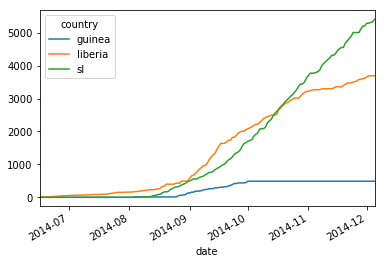

In [110]:
daily_cases.unstack().T.fillna(0).cumsum().plot()

## Resampling

An alternative to filling days without case reports with zeros is to aggregate the data at a coarser time scale. New cases are often reported by week; we can use the `resample` method to summarize the data into weekly values.

In [111]:
weekly_cases = daily_cases.unstack().T.resample('W').sum()
weekly_cases

country,guinea,liberia,sl
date,,,
2014-06-22,NaN,20.0,NaN
2014-06-29,NaN,28.0,NaN
2014-07-06,NaN,12.0,NaN
2014-07-13,NaN,18.0,NaN
2014-07-20,NaN,15.0,NaN
2014-07-27,NaN,56.0,NaN
2014-08-03,NaN,11.0,NaN
2014-08-10,11.0,10.0,NaN
2014-08-17,NaN,106.0,92.0


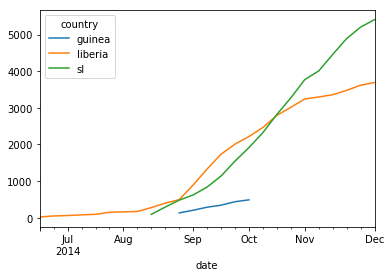

In [112]:
weekly_cases.cumsum().plot()

## Writing Data to Files

As well as being able to read several data input formats, pandas can also export data to a variety of storage formats. We will bring your attention to just one of these, but the usage is similar across formats.

In [113]:
medals_data.to_csv("../data/medals.csv", index=False)

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

## Missing data

The occurence of missing data is so prevalent that it pays to use tools like pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [114]:
!head -n 20 ../data/microbiome/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA
Firmicutes,10,162,3196
Firmicutes,11,372,-99999
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,?,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18


In [115]:
pd.read_csv("../data/microbiome/microbiome_missing.csv").head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Above, pandas recognized `NA` and an empty field as missing data.

In [116]:
pd.isnull(pd.read_csv("../data/microbiome/microbiome_missing.csv")).head(20)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [117]:
missing_sample = pd.read_csv("../data/microbiome/microbiome_missing.csv", 
                             na_values=['?', -99999], nrows=20)

missing_sample

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

By default, `dropna` drops entire rows in which one or more values are missing.

In [118]:
missing_sample.dropna()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
9,Firmicutes,10,162.0,3196.0
11,Firmicutes,12,4255.0,4361.0
12,Firmicutes,13,107.0,1667.0


If we want to drop missing values column-wise instead of row-wise, we use `axis=1`.

In [119]:
missing_sample.dropna(axis=1)

,Taxon,Patient
0,Firmicutes,1
1,Firmicutes,2
2,Firmicutes,3
3,Firmicutes,4
4,Firmicutes,5
5,Firmicutes,6
6,Firmicutes,7
7,Firmicutes,8
8,Firmicutes,9
9,Firmicutes,10


Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero), a sentinel value, or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in pandas with the `fillna` argument.

In [120]:
missing_sample.fillna(-999)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,-999.0,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,-999.0
9,Firmicutes,10,162.0,3196.0


Sentinel values are useful in pandas because missing values are treated as floats, so it is impossible to use explicit missing values with integer columns. Using some large (positive or negative) integer as a sentinel value will allow the column to be integer typed.

### Exercise: Mean imputation

Fill the missing values in `missing_sample` with the mean count from the corresponding species across patients.

In [121]:
## Write your answer here 